# Image Classification using `CIFAR-10` dataset

![image.png](attachment:4ce35012-5488-45ba-be4a-71068bea78e3.png)

https://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
### Import certain libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
2+3

5

In [6]:
### Get the current working directory
os.getcwd()

'/content'

### Download & prepare the `CIFAR-10` dataset

*   The CIFAR10 dataset contains **60,000 color images** in `10 classes`, with `6,000 images` in each class.
*   Dataset is divided into **50,000 training images** and **10,000 testing** images.
*   Classes are `mutually exclusive` and there is no overlap between them
*   There is no overlap between `automobiles` and `trucks`. Truck class contains only `big` trucks.

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() #load the CIFAR-10 dataset directly from tf.keras

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
train_images.shape

(50000, 32, 32, 3)

In [9]:
print("Dimension of training dataset is:", train_images.ndim)

Dimension of training dataset is: 4


In [10]:
test_images.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
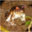

In [11]:
train_images[0]

In [12]:
print("Shape of the training images:", train_images.shape)
print("Shape of the training labels:", train_labels.shape)

Shape of the training images: (50000, 32, 32, 3)
Shape of the training labels: (50000, 1)


In [13]:
print("Shape of the testing images:", test_images.shape)
print("Shape of the testing labels:", test_labels.shape)

Shape of the testing images: (10000, 32, 32, 3)
Shape of the testing labels: (10000, 1)


In [14]:
train_labels.min(), train_labels.max()

(np.uint8(0), np.uint8(9))

### Select one image randomly from the `training dataset` & `visualize`

array([[[164, 215, 244],
        [162, 212, 240],
        [162, 212, 240],
        ...,
        [157, 210, 237],
        [153, 208, 235],
        [153, 203, 234]],

       [[168, 218, 245],
        [166, 215, 242],
        [166, 215, 242],
        ...,
        [164, 212, 238],
        [160, 209, 236],
        [158, 205, 235]],

       [[172, 220, 246],
        [170, 217, 243],
        [171, 218, 244],
        ...,
        [168, 212, 238],
        [165, 208, 235],
        [163, 207, 236]],

       ...,

       [[123, 160, 105],
        [117, 154, 102],
        [112, 149,  99],
        ...,
        [117, 136, 100],
        [ 95, 115,  79],
        [120, 149, 100]],

       [[120, 156, 100],
        [116, 151,  99],
        [112, 147,  96],
        ...,
        [126, 149, 110],
        [120, 144, 103],
        [120, 152, 101]],

       [[121, 154,  96],
        [120, 152,  99],
        [116, 148,  97],
        ...,
        [124, 152, 108],
        [124, 154, 107],
        [120, 154, 100]]], dtype=uint8)
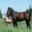

In [15]:
image = train_images[12] #13th image from `50000` images
image

In [16]:
image.shape

(32, 32, 3)

In [17]:
###  Extract the `R, G, B` channels
R = image[:, :, 0] #to extract one of the color channels from a color image --> RED
G = image[:, :, 1] #to extract one of the color channels from a color image --> GREEN
B = image[:, :, 2] #to extract one of the color channels from a color image --> BLUE

In [18]:
R.shape

(32, 32)

array([[164, 162, 162, ..., 157, 153, 153],
       [168, 166, 166, ..., 164, 160, 158],
       [172, 170, 171, ..., 168, 165, 163],
       ...,
       [123, 117, 112, ..., 117,  95, 120],
       [120, 116, 112, ..., 126, 120, 120],
       [121, 120, 116, ..., 124, 124, 120]], dtype=uint8)
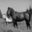

In [19]:
R

### Display the original image along with the `RGB` channels

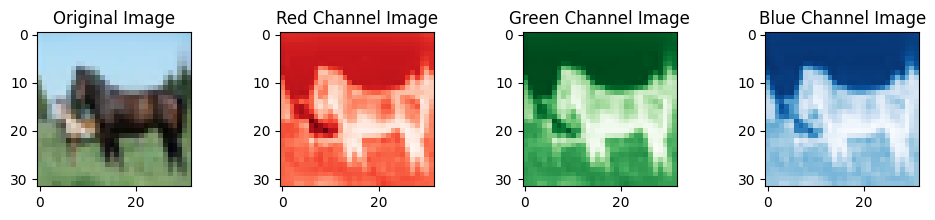

In [20]:
### Setting up the canvas
fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (12,2))

### Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")

### Red channel image
axs[1].imshow(R, cmap='Reds')
axs[1].set_title("Red Channel Image")

### Green channel image
axs[2].imshow(G, cmap='Greens')
axs[2].set_title("Green Channel Image")

### Red channel image
axs[3].imshow(B, cmap='Blues')
axs[3].set_title("Blue Channel Image")

plt.show()

### Let us plot a `few more` but this time with class/label legend


In [21]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Training Images with class names

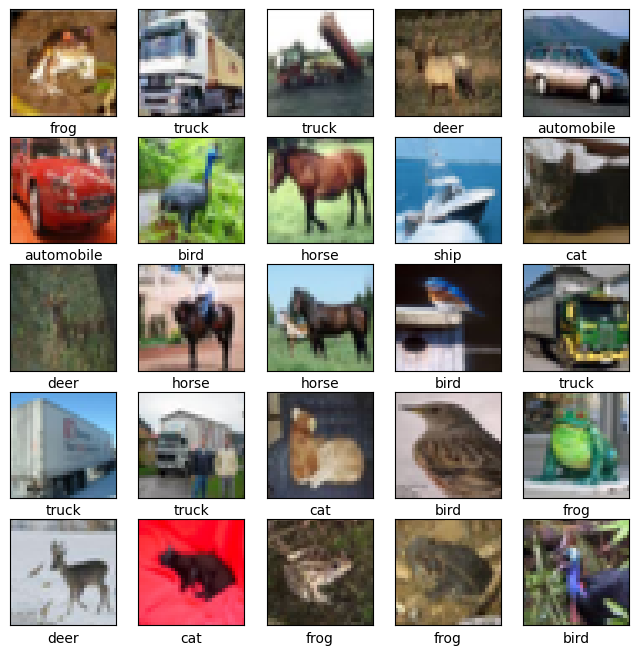

In [23]:
plt.figure(figsize = (8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(train_images[i]) #plot the images from 0 till 24
    plt.xlabel(class_names[train_labels[i][0]]) #tagging the class label to the respective class names using class_names list
plt.show()


### Testing images with class names

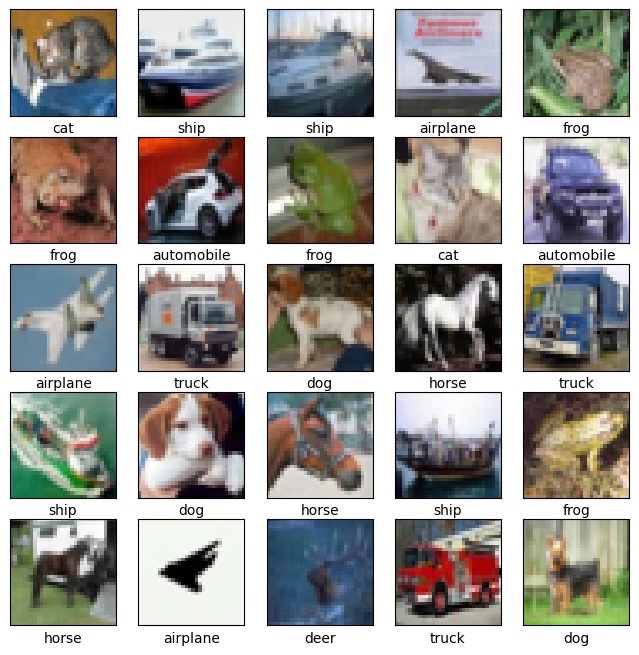

In [24]:
plt.figure(figsize = (8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[i]) #plot the images from 0 till 24
    plt.xlabel(class_names[test_labels[i][0]]) #tagging the class label to the respective class names using class_names list
plt.show()


### TASK - Try plotting `random` 30-40 images from both `training` and `testing` sets

### Understanding the `CONVOLUTION OPERATION`

In [25]:
from PIL import Image, ImageChops

In [26]:
image_path = r"C:\Users\thesi\OneDrive\INTELLIPAAT\DL Sessions\09. AI and DL IITR-07Sep2025(M)\cat.jpg"

In [27]:
img = Image.open(image_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\thesi\\OneDrive\\INTELLIPAAT\\DL Sessions\\09. AI and DL IITR-07Sep2025(M)\\cat.jpg'

In [ ]:
img

In [ ]:
### To get the size of the CAT's image
width, height = img.size # (width, height)
print("Width of the CAT's image:", width, "px")
print("Height of the CAT's image:", height, "px")

In [ ]:
### Let us resize image from its original size to 200 by 200 pixels
img_resized = img.resize((240,200))
width1, height1 = img_resized.size
print("Width of the CAT's image:", width1, "px")
print("Height of the CAT's image:", height1, "px")

In [ ]:
img_resized

#### Convert the `resized cat` into an array

In [ ]:
cat_image_array = np.array(img_resized)

In [ ]:
cat_image_array.shape

In [ ]:
cat_image_array

### Converting original `CAT` image to `grayscale` image

In [ ]:
import cv2

In [ ]:
grey_cat = cv2.cvtColor(cat_image_array, cv2.COLOR_RGB2GRAY)
grey_cat

In [ ]:
grey_cat.min(), grey_cat.max()

### let us plot the grayscale CAT

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(grey_cat, cmap='gray')
plt.colorbar()
plt.show()

### Convolution Step

In [ ]:
gray_cat = grey_cat

In [ ]:
filters = {
    'Original': gray_cat,
    'Sobel X': cv2.Sobel(gray_cat, cv2.CV_64F, 1, 0, ksize = 3),
    'Sobel Y': cv2.Sobel(gray_cat, cv2.CV_64F, 0, 1, ksize = 3),
    'Laplacian': cv2.Laplacian(gray_cat, cv2.CV_64F),
    'Sharpen': cv2.filter2D(gray_cat, -1, kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])),
    'Gaussian Blur': cv2.GaussianBlur(gray_cat, (5,5), 0)
}

In [ ]:
### Plot the results of the above filters
plt.figure(figsize = (8,6))

for i, (title, img) in enumerate(filters.items(),1):
    plt.subplot(2,3,i)
    cmap = 'gray' if len(img.shape)==2 else None
    plt.imshow(img, cmap = cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Let us create a `Base Convolutional Neural Network Model`

`Conv1D` is used for the text

**`--> Conv2D` is used for the images**

`Conv3D` is used for the videos//motion --> `MRI & CT Analysis`

![image.png](attachment:9e1ff16f-8ddb-4ccd-845b-854d98ac4087.png)

In [28]:
base_model = models.Sequential() #placeholder for the base model --> object is 'base model'

In [29]:
base_model

<Sequential name=sequential, built=False>

In [30]:
## Adding the first convolutional layer (filter layer on top of the input images) followed by max pooling
base_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32, 32, 3))) #added a conv2D layer having 32 filters with kernel_size: 3 X3
base_model.add(layers.MaxPool2D((2, 2))) #adds a max pooling layer with pool size of 2X2 --> to reduce the spatial dimensions --> by half


## Adding the second convolutional layer followed by max pooling
base_model.add(layers.Conv2D(64, (3,3), activation='relu')) #added a conv2D layer having 64 filters with kernel_size: 3 X3
base_model.add(layers.MaxPool2D((2, 2))) #adds a max pooling layer with pool size of 2X2 --> to reduce the spatial dimensions --> by half


## Adding the third convolutional layer but no max pooling
base_model.add(layers.Conv2D(64, (3,3), activation='relu')) #added a conv2D layer having 64 filters with kernel_size: 3 X3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Let us add `ANN` block on top of the above `CNN` block

In [32]:
base_model.add(layers.Flatten()) #converts a multi-dimensional input coming from CNN into a 1D vector --> Flattening
base_model.add(layers.Dense(64, activation='relu')) #a dense layer which means fully connected layer having 64 neurons with AF as `relu`
base_model.add(layers.Dense(10)) #final layer which is the output layer with 10 neurons given that there are 10 classes in CIFAR-10 dataset

In [33]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

- Even a simple and base CNN model architecture for `CIFAR-10` dataset needs to go through **`~122.5 K`** parameters

### Compile and train the model

In [34]:
base_model.compile(optimizer = 'adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics = ['accuracy']
                  )

In [35]:
history_01 = base_model.fit(train_images, train_labels, epochs = 50, validation_data = (test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3084 - loss: 2.5931 - val_accuracy: 0.5156 - val_loss: 1.3357
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5313 - loss: 1.3200 - val_accuracy: 0.5703 - val_loss: 1.2339
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5937 - loss: 1.1631 - val_accuracy: 0.5985 - val_loss: 1.1573
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6390 - loss: 1.0377 - val_accuracy: 0.6181 - val_loss: 1.0996
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6736 - loss: 0.9358 - val_accuracy: 0.6517 - val_loss: 1.0367
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6931 - loss: 0.8814 - val_accuracy: 0.6097 - val_loss: 1.1767
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7157 - loss: 0.8264 - val_accuracy: 0.6689 - val_loss: 0.9861
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7372 - loss: 0.7575 -

Plotting the **`accuracy vs epoch`** chart for training and validation set

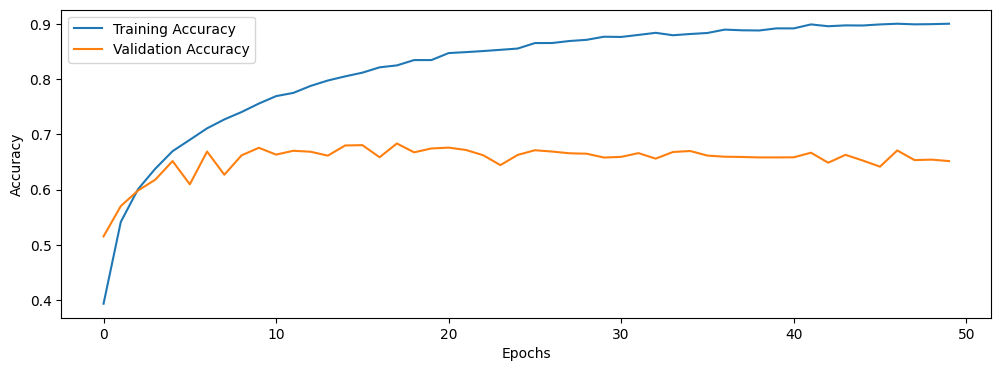

In [46]:
plt.figure(figsize = (12,4))
plt.plot(history_01.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_01.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### `Fine-tuning` the `base` CNN Model

### Technique : 1 | BATCH NORMALIZATION

In [39]:
bn_model = models.Sequential() #placeholder for the batch normalized model --> object is  `bn_model`

In [40]:
## Adding the first convolutional layer (filter layer on top of the input images) followed by max pooling
bn_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32, 32, 3))) #added a conv2D layer having 32 filters with kernel_size: 3 X3

### Adding a batch normalization after the first convolution layer
bn_model.add(layers.BatchNormalization()) # normalizes the ouput of the convolution layer

### First pooling layer
bn_model.add(layers.MaxPool2D((2, 2))) #adds a max pooling layer with pool size of 2X2 --> to reduce the spatial dimensions --> by half


## Adding the second convolutional layer followed by max pooling
bn_model.add(layers.Conv2D(64, (3,3), activation='relu')) #added a conv2D layer having 64 filters with kernel_size: 3 X3

### Adding a batch normalization after the second convolution layer
bn_model.add(layers.BatchNormalization()) # normalizes the ouput of the convolution layer

### Second Pooling Layer
bn_model.add(layers.MaxPool2D((2, 2))) #adds a max pooling layer with pool size of 2X2 --> to reduce the spatial dimensions --> by half

## Adding the third convolutional layer but no max pooling
bn_model.add(layers.Conv2D(64, (3,3), activation='relu')) #added a conv2D layer having 64 filters with kernel_size: 3 X3

### Let us add `ANN` block on top of the above `CNN` block

In [41]:
bn_model.add(layers.Flatten()) #converts a multi-dimensional input coming from CNN into a 1D vector --> Flattening
bn_model.add(layers.Dense(64, activation='relu')) #a dense layer which means fully connected layer having 64 neurons with AF as `relu`
bn_model.add(layers.Dense(10)) #final layer which is the output layer with 10 neurons given that there are 10 classes in CIFAR-10 dataset

In [42]:
bn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,954 (480.29 KB)

 Trainable params: 122,762 (479.54 KB)

 Non-trainable params: 192 (768.00 B)

In [43]:
### Compile and train the model
bn_model.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy']
)

In [44]:
history_02 = bn_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4336 - loss: 1.5891 - val_accuracy: 0.4379 - val_loss: 1.7764
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6405 - loss: 1.0189 - val_accuracy: 0.6010 - val_loss: 1.2126
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6988 - loss: 0.8439 - val_accuracy: 0.6838 - val_loss: 0.9179
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7455 - loss: 0.7209 - val_accuracy: 0.6434 - val_loss: 1.0473
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7743 - loss: 0.6418 - val_accuracy: 0.6823 - val_loss: 0.9560
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8012 - loss: 0.5652 - val_accuracy: 0.7097 - val_loss: 0.9073
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8249 - loss: 0.5013 - val_accuracy: 0.6800 - val_loss: 1.0680
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8391 - loss: 0.4515 

### Capturing the performance of the `base + **batch normalization**` CNN model

- epochs: `50`
- training accuracy: `97%`
- validation accuracy: `70%`

-- Conclusion: Model seems to be `still highly overfit` however training accuracy has improved

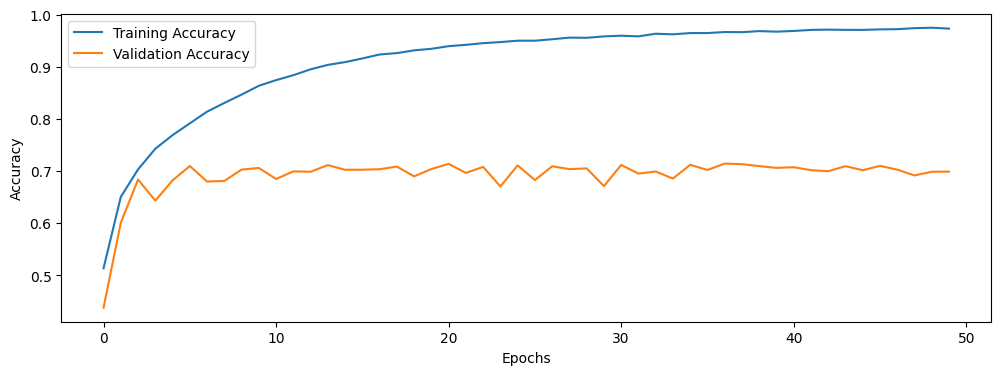

In [48]:
plt.figure(figsize = (12,4))
plt.plot(history_02.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_02.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**TECHNIQUE 1, 2 &3** - Fine-tuning the base model with `BATCH NORMALIZATION` + `DROPOUT` + `L2 REGULARIZATION`

In [49]:
bn_dropout_l2_model = models.Sequential() #placeholder for the batch normalized model
bn_dropout_l2_model

<Sequential name=sequential_3, built=False>

In [51]:
from tensorflow.keras.regularizers import l2

In [52]:
## Adding the first convolutional layer (filter layer on top of the input images) followed by max pooling
bn_dropout_l2_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32, 32, 3))) #added a conv2D layer having 32 filters with kernel_size: 3 X3

### Adding a batch normalization after the first convolution layer
bn_dropout_l2_model.add(layers.BatchNormalization()) # normalizes the ouput of the convolution layer

### First pooling layer
bn_dropout_l2_model.add(layers.MaxPool2D((2, 2))) #adds a max pooling layer with pool size of 2X2 --> to reduce the spatial dimensions --> by half

### Dropout Layer
bn_dropout_l2_model.add(layers.Dropout(0.25)) #dropping out 25% of the neurons


## Adding the second convolutional layer followed by max pooling
bn_dropout_l2_model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01))) #added a conv2D layer having 64 filters with kernel_size: 3 X3

### Adding a batch normalization after the second convolution layer
bn_dropout_l2_model.add(layers.BatchNormalization()) # normalizes the ouput of the convolution layer

### Second Pooling Layer
bn_dropout_l2_model.add(layers.MaxPool2D((2, 2))) #adds a max pooling layer with pool size of 2X2 --> to reduce the spatial dimensions --> by half

### Dropout Layer
bn_dropout_l2_model.add(layers.Dropout(0.25)) #dropping out 25% of the neurons

## Adding the third convolutional layer but no max pooling
bn_dropout_l2_model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01))) #added a conv2D layer having 64 filters with kernel_size: 3 X3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Let us add `ANN` block on top of the above `CNN` block

In [53]:
bn_dropout_l2_model.add(layers.Flatten()) # converts a multi-dimensional input coming from CNN into a 1D vector
bn_dropout_l2_model.add(layers.Dense(64, activation='relu')) #a dense layer which means fully connected layer having 64 neurons with af as 'ReLU'
bn_dropout_l2_model.add(layers.Dense(10)) #final layer which is output layer with 10 neurons given that there are 10 classes in CIFAR-10 dataset

In [54]:
bn_dropout_l2_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,954 (480.29 KB)

 Trainable params: 122,762 (479.54 KB)

 Non-trainable params: 192 (768.00 B)

### Compile and train the model

In [55]:
bn_dropout_l2_model.compile(optimizer='adam',
                            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            metrics=['accuracy']
)

In [56]:
history_03 = bn_dropout_l2_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3965 - loss: 2.2848 - val_accuracy: 0.4943 - val_loss: 1.6152
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5908 - loss: 1.3706 - val_accuracy: 0.5673 - val_loss: 1.4765
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6387 - loss: 1.2492 - val_accuracy: 0.5772 - val_loss: 1.4236
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6566 - loss: 1.2037 - val_accuracy: 0.6666 - val_loss: 1.1810
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6719 - loss: 1.1583 - val_accuracy: 0.5921 - val_loss: 1.4014
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6812 - loss: 1.1342 - val_accuracy: 0.5379 - val_loss: 1.7038
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6921 - loss: 1.1038 - val_accuracy: 0.6807 - val_loss: 1.1245
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6936 - loss: 1.0916 

### Capturing the performance of the `base + **batch normalization + Dropout + Regularization**` CNN model

- epochs: `50`
- training accuracy: `75%`
- validation accuracy: `72%`

-- Conclusion: Model is `NOT` overfit anymore however training accuracy can be improved

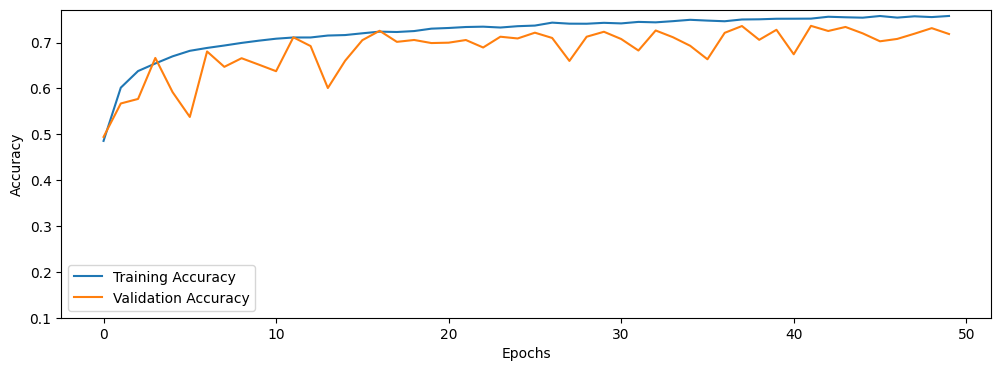

In [63]:
plt.figure(figsize = (12,4))
plt.plot(history_03.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_03.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.1)
plt.legend()
plt.show()

**TASK: ITERATE AND MODIFY THE MODEL'S ARCHITECTURE & CONFIG. TO GET BETTER ACCURACY THAN THIS?**